# Case Study: Transaksi Judi Online
## Fraud Data Analytics Internship
### by Ferdian Razak

Kasus studi ini berkaitan dengan lonjakan transaksi mencurigakan yang diduga merupakan transaksi judi online di Indonesia. Penyedia layanan pembayaran, terutama yang menggunakan E-Money dan dompet digital, diwajibkan untuk mematuhi regulasi pemerintah dalam melaporkan dan memblokir transaksi semacam ini guna menghindari denda dan menjaga reputasi.

Transaksi judi online seringkali memiliki karakteristik yang berbeda dari transaksi normal. Oleh karena itu, penting untuk mengidentifikasi pola transaksi ini untuk mendeteksi dan mencegah transaksi yang mencurigakan.

## Business Question

Berdasarkan latar belakang dan tujuan yang disajikan, berikut adalah beberapa pertanyaan bisnis utama yang ingin dijawab melalui analisis ini:

1. Bagaimana kita dapat mengidentifikasi transaksi perjudian online yang belum terlapor ("unidentified") dari dataset ini?
2. Apa pola transaksi dari customer_id tertentu yang terkait dengan perjudian online dan bagaimana perbedaannya dengan transaksi normal?
3. Bagaimana kita bisa mengembangkan model prediktif untuk mengklasifikasikan transaksi sebagai perjudian online berdasarkan fitur yang tersedia (misalnya jumlah transaksi, waktu, customer_id, dsb.)?

## Data Understanding
Dataset ini berisi informasi transaksi keuangan yang terkait dengan aktivitas pembayaran menggunakan layanan E-Money dan dompet digital. Fokus dari analisis ini adalah mengidentifikasi pola transaksi yang terkait dengan aktivitas judi online.

Kolom penting:
- orderid: ID unik untuk setiap transaksi.
- trans_initiate_time: Waktu transaksi dimulai.
- trans_end_time: Waktu transaksi berakhir.
- debit_party_id: ID pihak debit (pengirim).
- credit_party_id: ID pihak kredit (penerima).
- trans_amount: Jumlah transaksi.
- fee: Biaya transaksi.
- commission: Komisi yang dibayarkan.
- label: Penanda apakah transaksi termasuk kategori reported (terindikasi judi online) atau unidentified.

Beberapa poin penting dari dataset:
- Jumlah kolom: 41
- Jumlah baris: 1000

Beberapa kolom memiliki nilai yang hilang, seperti credit_party_type, redeemed_point_amount, remark, dan reason. Ini akan menjadi perhatian dalam proses analisis lebih lanjut.

## Import Libraries

In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


## Data Collection

### Read Data

In [2]:
file_path = 'D:/Kuliah/hashed_sampledata_casestudy.csv'
df = pd.read_csv(file_path)
df

,orderid,trans_status,trans_initiate_time,trans_end_time,debit_party_id,debit_party_type,debit_party_account,debit_party_mnemonic,credit_party_id,credit_party_type,...,initiator_mnemonic,reason,thirdpartyid,linkedorder_createtime,linkedorder_endtime,error_message,debit_user_sharia,credit_user_sharia,is_sharia,label
0,9DIxxxxU13,completed,2022-04-18 20:44:16,2022-04-18 20:44:16,201xxxxxxxxxxxx700,merchant,500xxxxxxxxxxxx136,628xxxxxxxx12 - CUxxxxxxxELL,201xxxxxxxxxxxx864,merchant,...,CUTxxxxxxxxxxxxxxxxxxxx412,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
1,BGWxxxxKV3,completed,2022-09-28 15:41:28,2022-09-28 15:41:28,202xxxxxxxxxxxx292,customer,100xxxxxxxxxxxx440,628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI,201xxxxxxxxxxxx496,merchant,...,628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI,BuyGoodsKUE,NaN,NaN,NaN,NaN,False,False,False,unidentified
2,C4Dxxxx921,completed,2023-08-07 21:58:49,2023-08-07 21:58:49,202xxxxxxxxxxxx886,customer,100xxxxxxxxxxxx960,628xxxxxxx560-IPAxxxxxxPAH,202xxxxxxxxxxxx944,customer,...,628xxxxxxx560-IPAxxxxxxPAH,SendMoney,NaN,NaN,NaN,NaN,False,True,True,reported
3,7EGxxxxML2,completed,2020-05-16 9:25:38,2020-05-16 9:25:38,201xxxxxxxxxxxx278,merchant,500xxxxxxxxxxxx984,628xxxxxxxx57 - AUxxxxxELL-230xxxx663,201xxxxxxxxxxxx288,merchant,...,AUFxxxxELL-230xxxxxxxxxxxxxxxxxx157,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
4,C4Dxxxx104,completed,2023-08-09 15:06:09,2023-08-09 15:06:09,202xxxxxxxxxxxx376,customer,200xxxxxxxxxxx000,628xxxxxxx684-AHMxxxxxxxxRDI,202xxxxxxxxxxxx000,customer,...,628xxxxxxx684-AHMxxxxxxxxRDI,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7KKxxxxL1D,completed,2020-11-20 20:27:19,2020-11-20 20:27:19,201xxxxxxxxxxxx290,merchant,500xxxxxxxxxxxx704,628xxxxxxxx76 - 60xxxxxx59 - 82xxxxxx476,201xxxxxxxxxxxx184,merchant,...,600xxxxx59 - 82xxxxxxxxxxxxxxxxxxxx476,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
996,C4Axxxx60J,completed,2023-07-13 5:31:18,2023-07-13 5:31:18,202xxxxxxxxxxxx022,customer,100xxxxxxxxxxxx784,628xxxxxxxx68 - LAxxxxxxxADI,202xxxxxxxxxxxx832,customer,...,628xxxxxxxx68 - LAxxxxxxxADI,SendMoney,NaN,NaN,NaN,NaN,True,False,True,unidentified
997,C54xxxxA0H,completed,2023-11-07 11:44:42,2023-11-07 11:44:42,201xxxxxxxxxxxx399,merchant,500xxxxxxxxxxxx328,628xxxxxxxx53 - R xxxxxxxxxxSEL,201xxxxxxxxxxxx176,merchant,...,R Sxxxxxxxxxxxxxxxxxxxxxxx753,NaN,NaN,NaN,NaN,NaN,False,False,False,unidentified
998,C48xxxx70J,completed,2023-06-10 0:48:39,2023-06-10 0:48:39,202xxxxxxxxxxxx987,customer,100xxxxxxxxxxxx400,628xxxxxxxx99 - ARxxxxxxxxxJAT,202xxxxxxxxxxxx432,customer,...,628xxxxxxxx99 - ARxxxxxxxxxJAT,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified


### Simple Data Checking

In [3]:
# Periksa informasi umum dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   orderid                 1000 non-null   object 
 1   trans_status            1000 non-null   object 
 2   trans_initiate_time     1000 non-null   object 
 3   trans_end_time          1000 non-null   object 
 4   debit_party_id          1000 non-null   object 
 5   debit_party_type        1000 non-null   object 
 6   debit_party_account     1000 non-null   object 
 7   debit_party_mnemonic    1000 non-null   object 
 8   credit_party_id         1000 non-null   object 
 9   credit_party_type       996 non-null    object 
 10  credit_party_account    1000 non-null   object 
 11  credit_party_mnemonic   996 non-null    object 
 12  trans_amount            1000 non-null   int64  
 13  fee                     1000 non-null   float64
 14  commission              1000 non-null   f

In [4]:
# Baris dan kolom kerangka data
print(df.shape)

(1000, 41)


In [5]:
# Periksa nilai unik kolom 'label' untuk melihat distribusi transaksi yang 'reported' dan 'unidentified'
label_distribution = df['label'].value_counts()

label_distribution

label
unidentified    900
reported        100
Name: count, dtype: int64

In [6]:
# Periksa nilai yang hilang berdasarkan kolom dan di setiap fitur
missing_values = df.isnull().sum()
missing_values

orderid                      0
trans_status                 0
trans_initiate_time          0
trans_end_time               0
debit_party_id               0
debit_party_type             0
debit_party_account          0
debit_party_mnemonic         0
credit_party_id              0
credit_party_type            4
credit_party_account         0
credit_party_mnemonic        4
trans_amount                 0
fee                          0
commission                   0
discount_amount              0
redeemed_point_amount      976
redeemed_point_type        993
currency                     0
is_reversed                  0
is_reversal                 51
is_partial_reversed          0
linked_type                999
linked_orderid             995
derived_orderid           1000
reason_type                 16
reason_name                  4
transaction_type            19
remark                     667
channel                     57
initiator_id                 0
initiator_mnemonic          52
reason  

## Pre-processing Data

### Handle Missing Data

In [7]:
# Menghitung persentase data yang hilang untuk setiap kolom
missing_data_percentage = (missing_values / len(df)) * 100

# Menggabungkan jumlah dan persentase yang hilang menjadi satu kerangka data
missing_data_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_data_percentage
})

# Mengurutkan berdasarkan persentase data yang hilang dalam urutan menurun
missing_data_df_sorted = missing_data_df[missing_data_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

missing_data_df_sorted


,Missing Values,Percentage
derived_orderid,1000,100.0
linked_type,999,99.9
linkedorder_createtime,995,99.5
linked_orderid,995,99.5
linkedorder_endtime,995,99.5
redeemed_point_type,993,99.3
redeemed_point_amount,976,97.6
error_message,970,97.0
remark,667,66.7
reason,572,57.2


In [8]:
# Menghapus kolom dengan lebih dari 90% data hilang
columns_to_drop = missing_data_df_sorted[missing_data_df_sorted['Percentage'] > 90].index
data_cleaned = df.drop(columns=columns_to_drop)
data_cleaneded = data_cleaned.isnull().sum()

### Handle Outliers dengan IQR

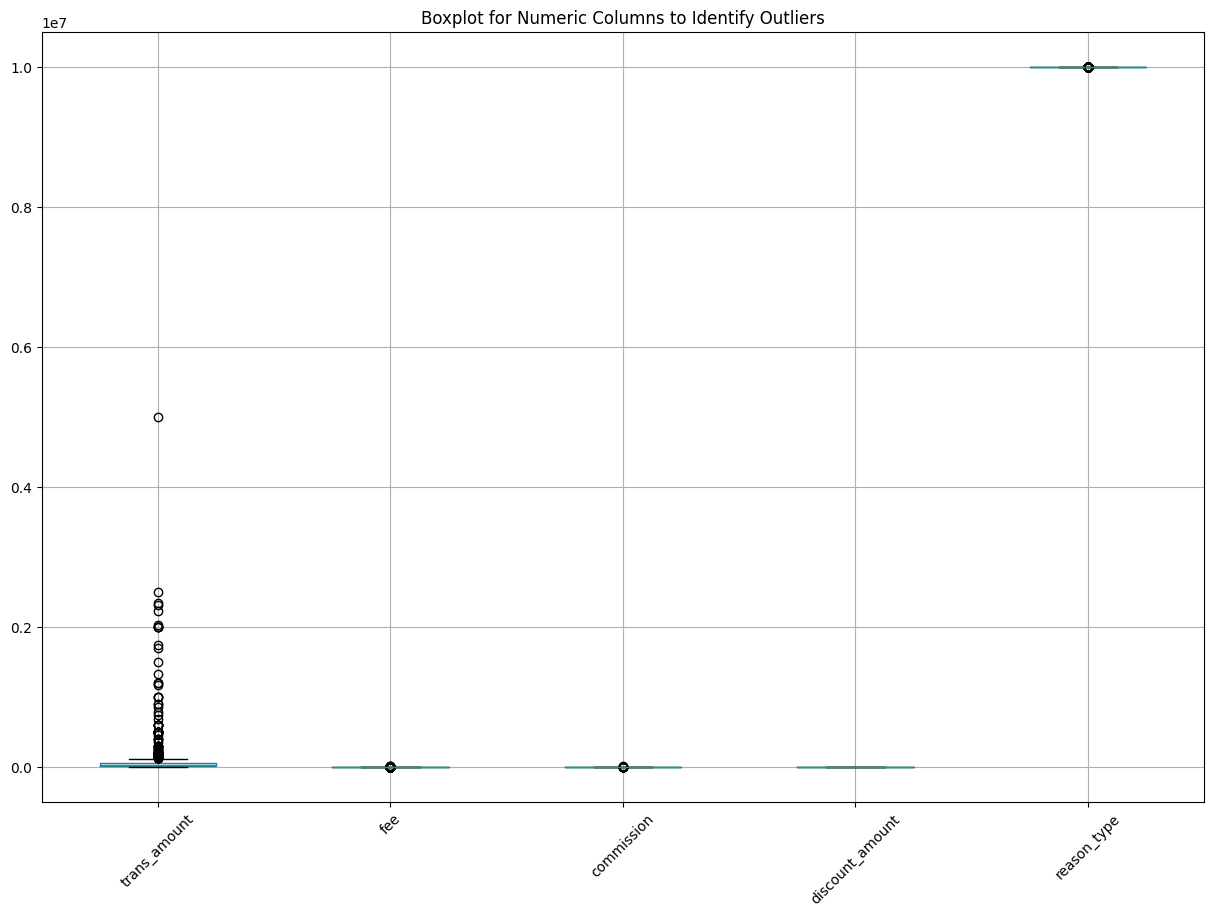

In [9]:
# Mengidentifikasi kolom numerik untuk mendeteksi outlier
numeric_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Memvisualisasikan outlier menggunakan boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 10))
data_cleaned[numeric_columns].boxplot()
plt.title("Boxplot for Numeric Columns to Identify Outliers")
plt.xticks(rotation=45)
plt.show()


In [10]:
# Tentukan fungsi untuk menghilangkan outlier menggunakan metode IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter outliernya
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Terapkan fungsi untuk menghapus outlier untuk kolom 'trans_amount'
data_no_outliers = remove_outliers_iqr(data_cleaned, 'trans_amount')

# Memeriksa bentuk data sebelum dan sesudah penghapusan outlier
original_shape = data_cleaned.shape
new_shape = data_no_outliers.shape

original_shape, new_shape


((1000, 33), (895, 33))

In [11]:
data_no_outliers.to_csv('D:/Kuliah/cleaned_data.csv', index=False)

Save data yang sudah dibersihkan

## Exploring the Data

### Distribusi berdasarkan Reason transaksi

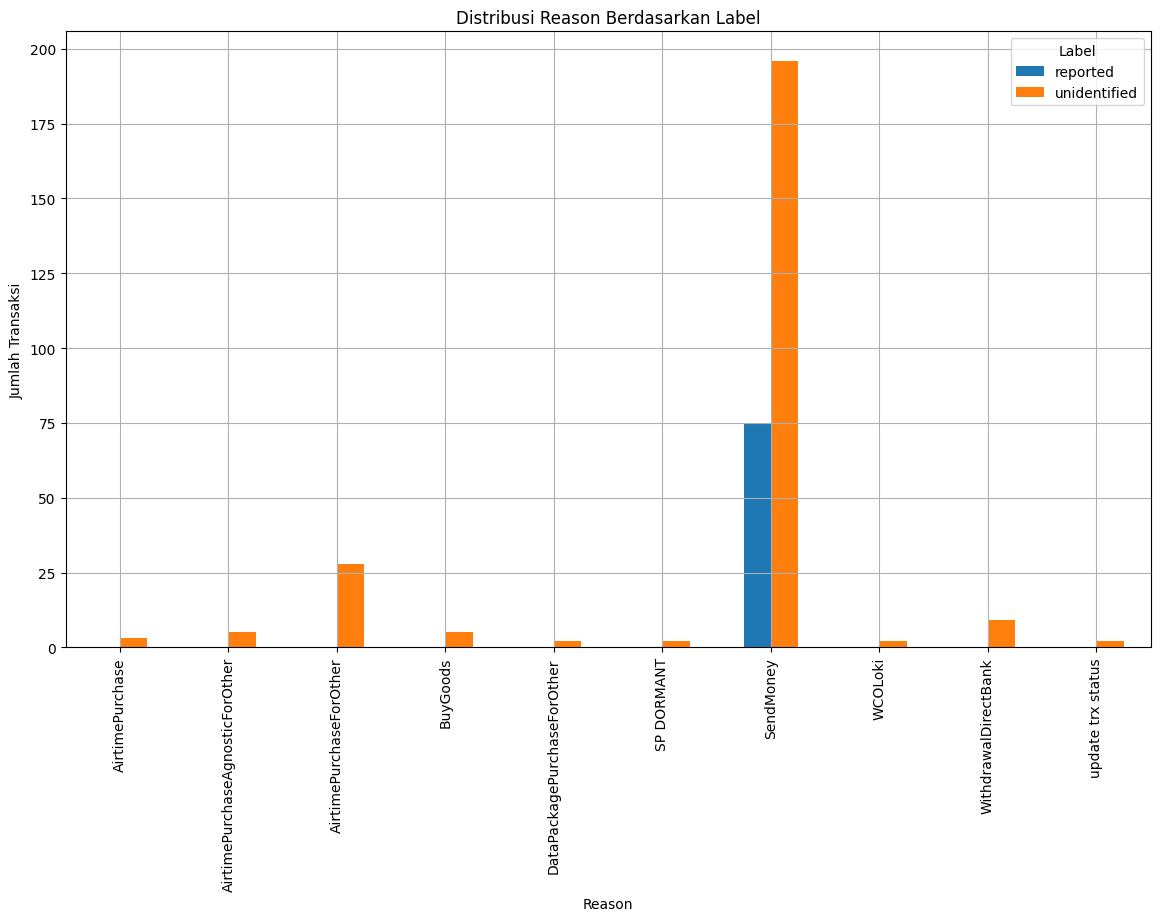

In [12]:
# Menghapus baris yang memiliki nilai null pada kolom 'reason'
data_no_outlier = data_no_outliers.dropna(subset=['reason'])

# Menganalisis hubungan antara kolom 'reason' dan 'label'
data_no_outliered = pd.crosstab(data_no_outlier['reason'], data_no_outlier['label'])

filtered_data_no_outliered = data_no_outliered[data_no_outliered.sum(axis=1) > 1]

# Membuat plot bar untuk distribusi reason dan label
filtered_data_no_outliered.plot(kind='bar', figsize=(14, 8))
plt.title('Distribusi Reason Berdasarkan Label')
plt.xlabel('Reason')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=90)
plt.legend(title='Label')
plt.grid(True)
plt.show()

SendMoney sebagai alasan transaksi utama yang memiliki hubungan kuat dengan transaksi yang dilabeli sebagai "reported". Ini dapat dijadikan fokus dalam mengidentifikasi pola transaksi judi online yang mungkin belum terlaporkan.

### Distribusi berdasarkan Tipe transaksi

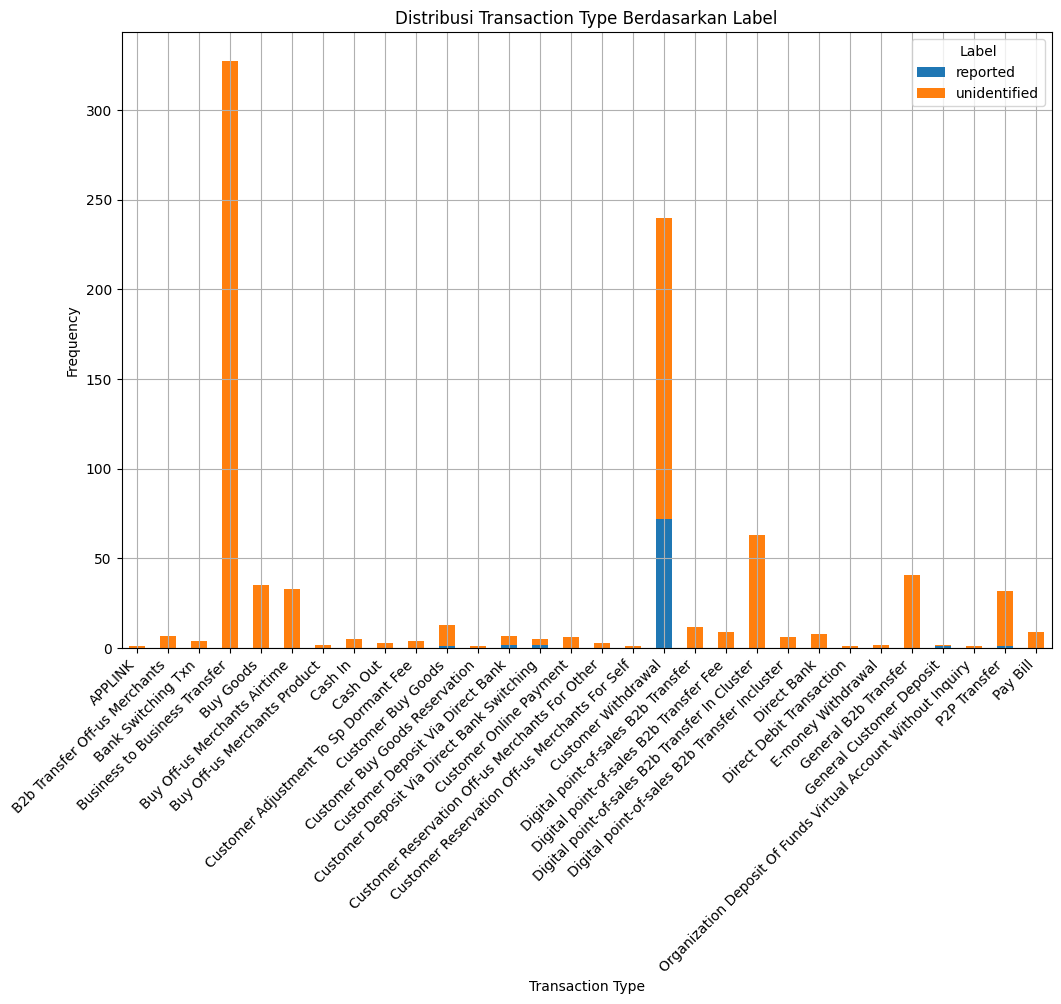

In [13]:
# Menghapus baris yang memiliki nilai null pada kolom "transaction_type"
data_no_outlier = data_no_outliers.dropna(subset=['transaction_type'])

# Menghitung distribusi "transaction_type" berdasarkan "label"
transaction_type_vs_label = pd.crosstab(data_no_outlier['transaction_type'], data_no_outlier['label'])

# Visualisasi distribusi "transaction_type" berdasarkan "label"
transaction_type_vs_label.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.title('Distribusi Transaction Type Berdasarkan Label')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.grid(True)
plt.show()


Customer Withdrawal: Terlihat memiliki beberapa transaksi yang dilabeli sebagai "reported". Visualisasi ini membantu untuk mengidentifikasi jenis transaksi yang lebih sering dikaitkan dengan label "reported".

### Distribusi berdasarkan Reason_name transaksi

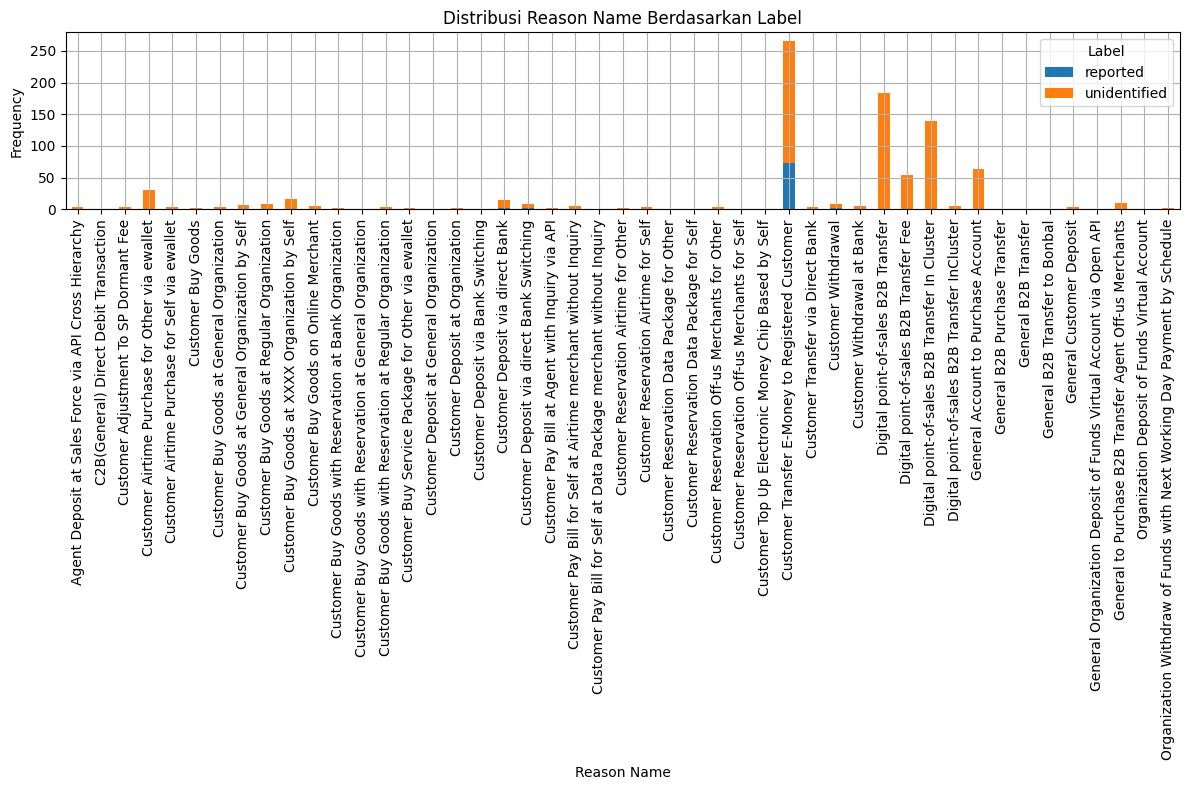

In [14]:
# Menghapus baris dengan nilai null pada kolom "reason_name"
data_no_outlier = data_no_outliers.dropna(subset=['reason_name'])

# Menghitung distribusi reason_name berdasarkan label untuk melihat pola yang muncul
reason_label_distribution = pd.crosstab(data_no_outlier['reason_name'], data_no_outlier['label'])
# Membuat visualisasi hubungan antara reason_name dan label menggunakan bar plot
reason_label_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Distribusi Reason Name Berdasarkan Label')
plt.xlabel('Reason Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Label')
plt.grid(True)
plt.tight_layout()
plt.show()


kasus "reported" yang paling sering terjadi adalah pada kategori "Customer Transfer E-Money to Registered Customer". Ini berarti bahwa sebagian besar laporan terkait dengan transaksi di mana pelanggan melakukan transfer uang elektronik kepada pelanggan yang sudah terdaftar.

### Distribusi berdasarkan Jumlah transaksi

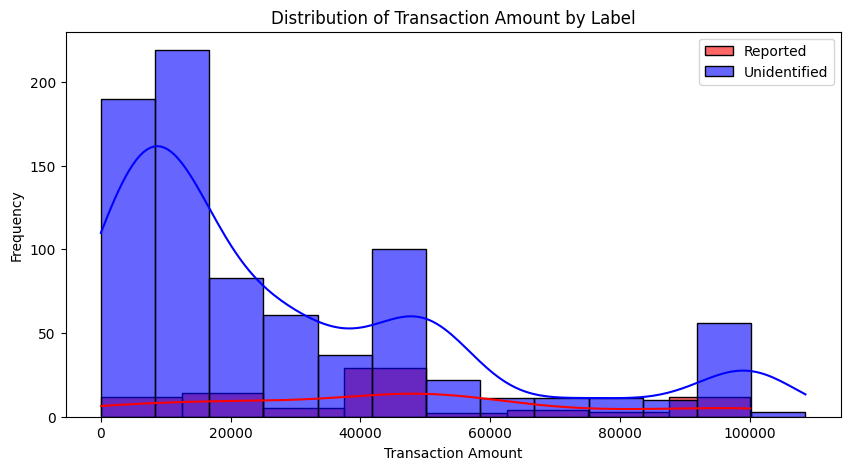

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
reported,81.0,45299.185185,30320.912060,50.0,20000.0,50000.0,50135.0,100000.0
unidentified,814.0,28359.965602,28356.611866,1.0,9900.0,16500.0,49000.0,108550.0


In [15]:
# Menghapus baris yang memiliki nilai null pada kolom 'trans_amount'
data_no_outlier = data_no_outliers.dropna(subset=['trans_amount'])

# Melihat kembali distribusi trans_amount berdasarkan label setelah pembersihan data
label_grouped = data_no_outlier.groupby('label')['trans_amount'].describe()

plt.figure(figsize=(10, 5))
sns.histplot(data_no_outliers[data_no_outliers['label'] == 'reported']['trans_amount'], color='red', kde=True, label='Reported', alpha=0.6)
sns.histplot(data_no_outliers[data_no_outliers['label'] == 'unidentified']['trans_amount'], color='blue', kde=True, label='Unidentified', alpha=0.6)
plt.title('Distribution of Transaction Amount by Label')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

label_grouped


Dari distribusi ini, kita dapat melihat bahwa sebagian besar kasus "reported" memiliki jumlah transaksi di bawah 100,000. Data ini mengindikasikan bahwa transaksi yang dilaporkan terkait judi online cenderung melibatkan jumlah yang lebih kecil, dengan mayoritas transaksi tidak melebihi 100,000. Ini mungkin mencerminkan sifat transaksi yang lebih sering dilakukan dengan jumlah yang lebih kecil untuk mengurangi risiko atau karena sifat frekuensi tinggi dari taruhan kecil dalam judi online.

### Distribusi berdasarkan Debit_party_type transaksi

In [16]:
# Menghapus baris yang memiliki nilai null pada kolom "debit_party_type"
data_no_outlier = data_no_outliers.dropna(subset=['debit_party_type'])

# Menganalisis hubungan antara "debit_party_type" dan "label"
debit_party_type_label_distribution = data_no_outlier.groupby(['debit_party_type', 'label']).size().unstack()

debit_party_type_label_distribution


label,reported,unidentified
debit_party_type,,
customer,76,317
merchant,5,497


Ini menunjukkan bahwa mayoritas kasus judi online yang dilaporkan lebih sering terjadi pada transaksi yang dilakukan oleh pelanggan dibandingkan dengan pedagang. Hal ini bisa mengindikasikan bahwa pelanggan lebih sering terlibat secara langsung dalam kegiatan judi online yang berakhir dengan pelaporan, sementara interaksi dengan pedagang yang berujung pada pelaporan relatif jarang. Ini juga bisa mencerminkan pola penggunaan di mana pelanggan lebih aktif dalam kegiatan ini atau lebih mungkin dilaporkan dalam kasus transaksi yang tidak sah atau bermasalah.

### Distribusi berdasarkan credit_party_type transaksi

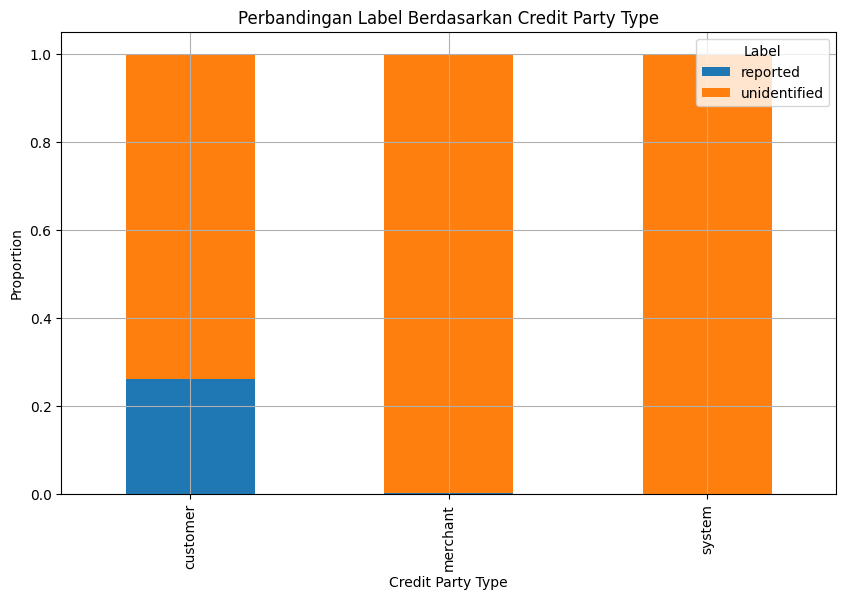

In [17]:
# Menghapus baris yang memiliki nilai null pada kolom "credit_party_type"
data_no_outlier = data_no_outliers.dropna(subset=['credit_party_type'])

# Analisis hubungan antara "credit_party_type" dan "label"
credit_party_type_label = pd.crosstab(data_no_outlier['credit_party_type'], data_no_outlier['label'], normalize='index')

# Membuat visualisasi dari hubungan antara "credit_party_type" dan "label"
credit_party_type_label.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Credit Party Type')
plt.ylabel('Proportion')
plt.title('Perbandingan Label Berdasarkan Credit Party Type')
plt.legend(title='Label')
plt.grid(True)
plt.show()


Data ini menegaskan bahwa dalam kasus judi online yang dilaporkan, pelanggan adalah kelompok yang paling sering terlibat sebagai pihak kredit dibandingkan dengan pedagang atau sistem. Ini mungkin mencerminkan bahwa transaksi yang melibatkan pelanggan lebih rentan terhadap masalah atau pelanggaran yang menyebabkan mereka dilaporkan, atau bahwa pelanggan lebih aktif dalam jenis transaksi ini.

### Distribusi berdasarkan waktu transaksi

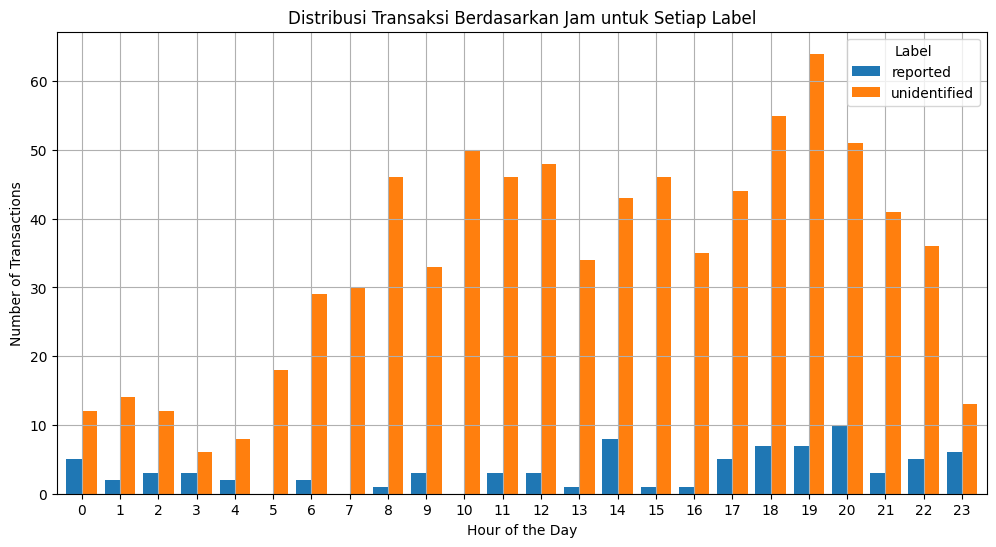

In [18]:
# Menghapus baris yang memiliki nilai null pada kolom "trans_initiate_time"
data_no_outlier = data_no_outliers.dropna(subset=['trans_initiate_time'])

# Mengonversi kolom "trans_initiate_time" menjadi tipe datetime
data_no_outlier['trans_initiate_time'] = pd.to_datetime(data_no_outlier['trans_initiate_time'], errors='coerce')

# Mengekstrak informasi waktu seperti jam dan hari dari kolom "trans_initiate_time"
data_no_outlier['hour'] = data_no_outlier['trans_initiate_time'].dt.hour
data_no_outlier['day_of_week'] = data_no_outlier['trans_initiate_time'].dt.day_name()

# Analisis distribusi waktu transaksi berdasarkan label (jam)
hourly_distribution = data_no_outlier.groupby(['label', 'hour']).size().unstack().fillna(0)

# Analisis distribusi waktu transaksi berdasarkan label (hari dalam seminggu)
day_distribution = data_no_outlier.groupby(['label', 'day_of_week']).size().unstack().fillna(0)

hourly_distribution.T.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Distribusi Transaksi Berdasarkan Jam untuk Setiap Label')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.grid(True)

Kecenderungan ini mungkin dikaitkan dengan waktu luang yang lebih banyak yang dimiliki individu setelah jam kerja, sehingga lebih banyak transaksi terjadi dan lebih banyak kasus yang berpotensi dilaporkan selama jam antara 17:00 sampai 00:00.

### Pengelompokkan berdasarkan statistik

In [19]:
import datetime

# Convert trans_initiate_time to datetime for filtering by time range
data_no_outliers['trans_initiate_time'] = pd.to_datetime(data_no_outliers['trans_initiate_time'])

# Define the time range
start_time = "17:00"
end_time = "00:00"

# Filter data berdasarkan kriteria yang diberikan
filtered_df = data_no_outliers[
    (data_no_outliers['reason'] == "SendMoney") &
    (data_no_outliers['reason_name'] == "Customer Transfer E-Money to Registered Customer") &
    (data_no_outliers['trans_amount'] <= 100000) &
    (data_no_outliers['credit_party_type'] == "customer") &
    (data_no_outliers['remark'] == "SendMoney") &
]

filtered_df


C:\Users\acer\AppData\Local\Temp\ipykernel_17892\3009794127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['trans_initiate_time'] = pd.to_datetime(data_no_outliers['trans_initiate_time'])


,orderid,trans_status,trans_initiate_time,trans_end_time,debit_party_id,debit_party_type,debit_party_account,debit_party_mnemonic,credit_party_id,credit_party_type,...,remark,channel,initiator_id,initiator_mnemonic,reason,thirdpartyid,debit_user_sharia,credit_user_sharia,is_sharia,label
2,C4Dxxxx921,completed,2023-08-07 21:58:49,2023-08-07 21:58:49,202xxxxxxxxxxxx886,customer,100xxxxxxxxxxxx960,628xxxxxxx560-IPAxxxxxxPAH,202xxxxxxxxxxxx944,customer,...,SendMoney,API,202xxxxxxxxxxxx880,628xxxxxxx560-IPAxxxxxxPAH,SendMoney,NaN,False,True,True,reported
4,C4Dxxxx104,completed,2023-08-09 15:06:09,2023-08-09 15:06:09,202xxxxxxxxxxxx376,customer,200xxxxxxxxxxx000,628xxxxxxx684-AHMxxxxxxxxRDI,202xxxxxxxxxxxx000,customer,...,SendMoney,API,202xxxxxxxxxxxx368,628xxxxxxx684-AHMxxxxxxxxRDI,SendMoney,NaN,False,False,False,unidentified
7,CG8xxxxYD1,completed,2023-04-16 15:25:31,2023-04-16 15:25:31,202xxxxxxxxxxxx945,customer,200xxxxxxxxxxx856,628xxxxxxxx844-M.FxxxxxxxxxxxxxxTRA,202xxxxxxxxxxxx000,customer,...,SendMoney,API,202xxxxxxxxxxxx960,628xxxxxxxx844-M.FxxxxxxxxxxxxxxTRA,SendMoney,NaN,True,False,True,unidentified
9,C53xxxx71I,completed,2023-10-22 18:00:55,2023-10-22 18:00:55,202xxxxxxxxxxxx907,customer,200xxxxxxxxxxx188,628xxxxxxx362-SEGxxxxxxxNDA,202xxxxxxxxxxxx944,customer,...,SendMoney,API,202xxxxxxxxxxxx896,628xxxxxxx362-SEGxxxxxxxNDA,SendMoney,NaN,False,True,True,reported
12,C52xxxxD1K,completed,2023-10-09 19:15:41,2023-10-09 19:15:41,202xxxxxxxxxxxx516,customer,100xxxxxxxxxxxx536,628xxxxxxxx30 - BAxxxxxxxNOR,202xxxxxxxxxxxx160,customer,...,SendMoney,API,202xxxxxxxxxxxx520,628xxxxxxxx30 - BAxxxxxxxNOR,SendMoney,NaN,False,False,False,unidentified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,C4ExxxxA0N,completed,2023-08-24 22:09:30,2023-08-24 22:09:30,202xxxxxxxxxxxx283,customer,200xxxxxxxxxxx248,628xxxxxxx016-AHSxxxxxxxxxxxxNAM,202xxxxxxxxxxxx000,customer,...,SendMoney,API,202xxxxxxxxxxxx296,628xxxxxxx016-AHSxxxxxxxxxxxxNAM,SendMoney,NaN,False,False,False,reported
985,C4Cxxxx80N,completed,2023-07-26 00:42:48,2023-07-26 0:42:48,202xxxxxxxxxxxx108,customer,200xxxxxxxxxxx652,628xxxxxxx448-MARxxHAN,202xxxxxxxxxxxx648,customer,...,SendMoney,API,202xxxxxxxxxxxx104,628xxxxxxx448-MARxxHAN,SendMoney,NaN,True,True,True,unidentified
996,C4Axxxx60J,completed,2023-07-13 05:31:18,2023-07-13 5:31:18,202xxxxxxxxxxxx022,customer,100xxxxxxxxxxxx784,628xxxxxxxx68 - LAxxxxxxxADI,202xxxxxxxxxxxx832,customer,...,SendMoney,API,202xxxxxxxxxxxx008,628xxxxxxxx68 - LAxxxxxxxADI,SendMoney,NaN,True,False,True,unidentified
998,C48xxxx70J,completed,2023-06-10 00:48:39,2023-06-10 0:48:39,202xxxxxxxxxxxx987,customer,100xxxxxxxxxxxx400,628xxxxxxxx99 - ARxxxxxxxxxJAT,202xxxxxxxxxxxx432,customer,...,SendMoney,API,202xxxxxxxxxxxx000,628xxxxxxxx99 - ARxxxxxxxxxJAT,SendMoney,NaN,False,False,False,unidentified


In [26]:
total_rows = len(filtered_df)
reported_count = filtered_df[filtered_df['label'] == 'reported'].shape[0]

# Hitung persentase
percentage_reported = (reported_count / total_rows) * 100

print(f'Persentase label "reported": {percentage_reported:.2f}%')
number_of_reported = (data_no_outliers['label'] == 'reported').sum()
print(f"Number of rows labeled as 'reported': {number_of_reported}")
print(f"Percentage total as 'reported': {reported_count/number_of_reported*100:.2f}%")

Persentase label "reported": 30.77%
Number of rows labeled as 'reported': 81
Percentage total as 'reported': 88.89%


Transaksi Teridentifikasi 30,77% menandakan bahwa sejumlah transaksi dalam data telah memenuhi kriteria yang ditetapkan untuk diklasifikasikan sebagai judi online ilegal. Ini mengindikasikan bahwa sebagian dari aktivitas dalam data yang dianalisis memang termasuk dalam kategori yang tidak diizinkan atau ilegal.

88,89% dari total semua kasus "reported" ada dalam kriteria ini, ini mengindikasikan bahwa kriteria yang digunakan sangat signifikan dalam mengidentifikasi transaksi judi online ilegal. Hal ini memperkuat peran kriteria ini dalam menentukan pelabelan dan mendemonstrasikan pentingnya kriteria ini dalam keseluruhan proses deteksi.

## Logistic Regression untuk Prediksi

In [22]:
# Pilih kolom yang digunakan
selected_columns = [
    'reason', 'transaction_type', 'reason_name', 'trans_amount',
    'debit_party_type', 'credit_party_type', 'trans_initiate_time', 'remark',
    'is_sharia', 'debit_user_sharia', 'channel'
]

# Ambil subset data yang diperlukan
df_ml = data_no_outliers[selected_columns + ['label']].copy()

# Menangani nilai yang hilang dengan pengisian sederhana (fillna)
df_ml.fillna('missing', inplace=True)

# Ubah kolom waktu menjadi fitur baru (misalnya, hanya ambil jam dari waktu transaksi)
df_ml['trans_initiate_time'] = pd.to_datetime(df_ml['trans_initiate_time'], errors='coerce')
df_ml['trans_initiate_hour'] = df_ml['trans_initiate_time'].dt.hour.fillna(0).astype(int)

# Encoding kolom kategorikal menggunakan LabelEncoder
label_encoders = {}
for column in selected_columns:
    if df_ml[column].dtype == 'object':
        le = LabelEncoder()
        df_ml[column] = le.fit_transform(df_ml[column])
        label_encoders[column] = le

# Encoding label
le_label = LabelEncoder()
df_ml['label'] = le_label.fit_transform(df_ml['label'])

# Pisahkan fitur dan label
X = df_ml.drop(['label', 'trans_initiate_time'], axis=1)  # Menghapus kolom waktu yang asli setelah ekstraksi fitur
y = df_ml['label']

# Membagi dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Manual oversampling untuk kelas "reported"
df_train = pd.concat([X_train, y_train], axis=1)

# Pisahkan data yang dilabeli sebagai "reported" dan "unidentified"
reported = df_train[df_train['label'] == 1]  # Label 1 untuk "reported"
unidentified = df_train[df_train['label'] == 0]  # Label 0 untuk "unidentified"

# Oversample kelas "reported" hingga jumlahnya sama dengan kelas "unidentified"
reported_oversampled = reported.sample(len(unidentified), replace=True, random_state=42)

# Gabungkan kembali dataset yang telah di-oversample
df_oversampled = pd.concat([reported_oversampled, unidentified])

# Pisahkan kembali fitur dan label setelah oversampling
X_resampled = df_oversampled.drop(['label'], axis=1)
y_resampled = df_oversampled['label']

# Melatih model Random Forest dengan data yang telah di-oversample
rf_model_resampled = RandomForestClassifier(random_state=42)
rf_model_resampled.fit(X_resampled, y_resampled)

# Memprediksi pada data test
y_pred_rf_resampled = rf_model_resampled.predict(X_test)

# Evaluasi model
report_rf_resampled = classification_report(y_test, y_pred_rf_resampled, target_names=le_label.classes_)
conf_matrix_rf_resampled = confusion_matrix(y_test, y_pred_rf_resampled)

report_rf_resampled

'              precision    recall  f1-score   support\n\n    reported       0.24      0.88      0.38        24\nunidentified       0.98      0.73      0.84       245\n\n    accuracy                           0.75       269\n   macro avg       0.61      0.80      0.61       269\nweighted avg       0.92      0.75      0.80       269\n'

In [23]:
conf_matrix_rf_resampled

array([[ 21,   3],
       [ 65, 180]], dtype=int64)

Reported Class:
- Precision: 24% (low precision suggests many false positives)
- Recall: 88% (high recall indicates a good job of capturing positive instances)
- F1-score: 38% (relatively low, showing a trade-off due to low precision)
- Support: 24 instances

Unidentified Class:
- Precision: 98% (high precision indicates few false positives)
- Recall: 73% (moderate recall, some positives are missed)
- F1-score: 84% (high, indicating a good balance between precision and recall)
- Support: 245 instances

Overall:
- Accuracy: 75% (75% of predictions are correct)
- Macro avg (average performance across classes, treating all classes equally):
    - Precision: 61%
    - Recall: 80%
    - F1-score: 61%
- Weighted avg (average performance weighted by the support of each class):
    - Precision: 92%
    - Recall: 75%
    - F1-score: 80%

Confusion Matrix:
This shows the actual vs. predicted classifications:

- Reported Class:
    - True Positives: 21
    - False Negatives: 3 (reported as unidentified)

- Unidentified Class:
    - True Positives: 180
    - False Positives: 65 (unidentified reported as such)

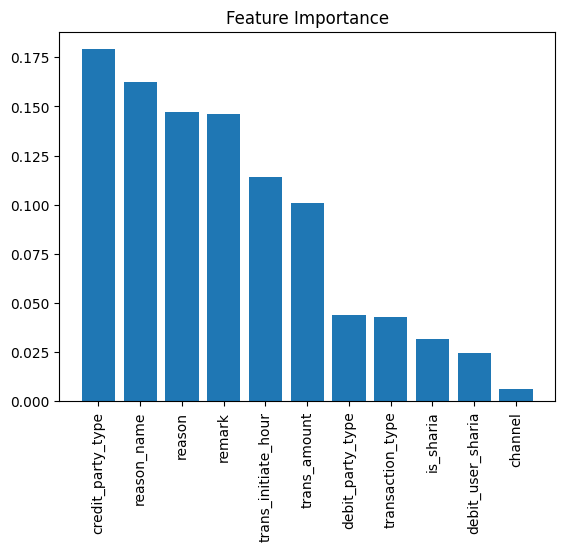

In [24]:
import matplotlib.pyplot as plt

# Feature importances from the random forest model
importances = rf_model_resampled.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_resampled.columns[i] for i in indices]

# Create a plot
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_resampled.shape[1]), importances[indices])
plt.xticks(range(X_resampled.shape[1]), names, rotation=90)
plt.show()


Fitur-fitur ini yang akan digunakan untuk membuat keputusan atau prediksi.

## Menyimpan model untuk Future Prediction

In [25]:
# Simpan model yang telah dilatih ke dalam sebuah file
model_filename = 'D:/Kuliah/model.joblib'
joblib.dump(rf_model_resampled, model_filename)

model_filename

'D:/Kuliah/model.joblib'

## Kesimpulan

- **Identifikasi Kasus "Reported" Berdasarkan Statistik:**
  
  Kasus "reported" teridentifikasi dengan signifikan ketika parameter-parameter diatur sebagai berikut. 
  
  - Alasan Transaksi: SendMoney
  - Tipe Transaksi: Customer Withdrawal
  - Nama Alasan: Customer Transfer E-Money to Registered Customer
  - Jumlah Transaksi: ≤ 100,000
  - Tipe Debit Party: customer
  - Tipe Credit Party: customer
  - Catatan Transaksi: SendMoney
  - Channel: API
  
  Ini menunjukkan bahwa transaksi dengan alasan parameter-parameter tersebut lebih berisiko atau menjadi sasaran kasus "reported".

- **Model Prediksi dengan RandomForestClassifier:**
  - Model RandomForestClassifier berhasil mengidentifikasi kasus "reported" dengan skor akurasi 75%. Ini menandakan bahwa sekitar tiga perempat prediksi oleh model adalah benar.
  - Detail lebih lanjut dari performa model termasuk:
    - **Precision:** 98%, menandakan tingkat kesalahan positif yang rendah dalam prediksi kasus "reported".
    - **Recall:** 73%, mengindikasikan bahwa model masih melewatkan sekitar 27% kasus "reported" yang sebenarnya.
    - **F1-score:** 84%, mencerminkan keseimbangan yang baik antara precision dan recall.
  - Model tersebut menghasilkan 65 kasus false positive yang bisa dinyatakan sebagai suspect untuk kasus "reported" yang tidak terdeteksi, mengindikasikan bahwa model mungkin terlalu konservatif atau sensitif terhadap kelas "unidentified".

- **Pentingnya Fitur dalam Prediksi:**
  - Feature importance menunjukkan bahwa beberapa fitur memiliki peranan penting dalam pengambilan keputusan model RandomForestClassifier, yang dapat membantu dalam memfokuskan faktor-faktor kritis dalam deteksi kasus.

- **Model untuk Future Prediction:**
  - Model yang telah dilatih disimpan untuk digunakan dalam prediksi masa depan, memungkinkan penggunaan model ini secara berkelanjutan untuk deteksi dini kasus judi online ilegal